# 依赖安装 & 数据下载

In [1]:
!pip install pyter
!git clone https://github.com/dqxiu/ParaSCI.git

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Processing /home/ec2-user/.cache/pip/wheels/a8/90/86/5b2d83cd2c24829440b137d762fc0d77b461e7156f8695b34e/pyter-0.2.2.1-py2-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/32/5b/7e/0df53aa8e264a6fe40fe7a3f9f0a63e2437cc276ae5b7e357e/distribute-0.7.3-py2-none-any.whl
Cloning into 'ParaSCI'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 67 (delta 13), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (67/67), done.


# 加载数据

In [8]:
import sys
import argparse
import codecs
import copy
import os
import pyter
from tqdm import tqdm

In [9]:
acl_train_ref = open("ParaSCI/Data/ParaSCI-arXiv/train/train.src")
acl_train_hyp = open("ParaSCI/Data/ParaSCI-arXiv/train/train.tgt")

In [10]:
ref,hyp=[],[]
while acl_train_ref.readline():
    line=acl_train_ref.readline()
    ref.append(line.strip('\n').split())
while acl_train_hyp.readline():
    line=acl_train_hyp.readline()
    hyp.append(line.strip('\n').split())
ref,hyp =ref[:1000],hyp[:1000] # 时间原因这里只取前1000条进行训练

# TER计算

In [12]:
res=[]
for i in tqdm(range(len(ref))):
    try:
        res.append(pyter.ter(hyp[i], ref[i]))
    except:
        pass

100%|██████████| 1000/1000 [00:04<00:00, 237.83it/s]


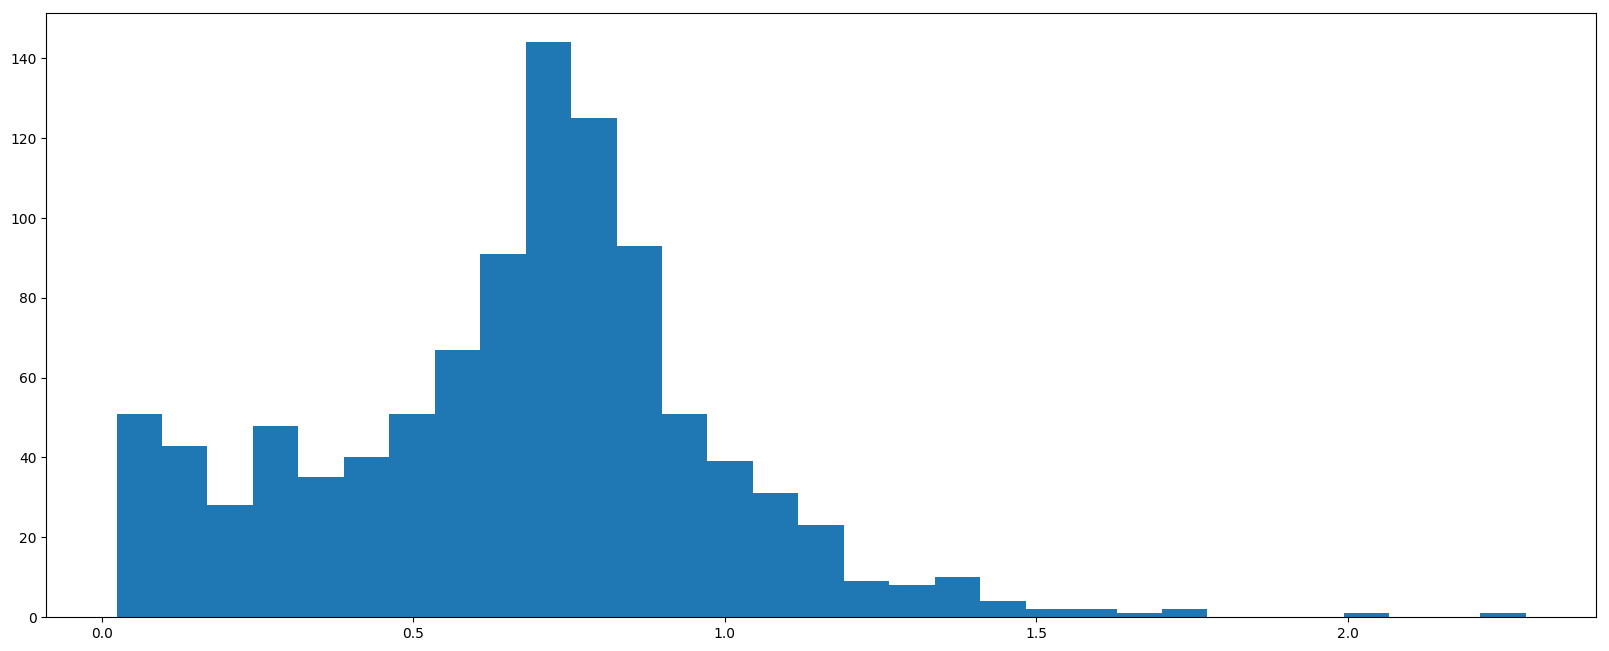

In [23]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(20, 8), dpi=100)

bins = 'auto'

plt.hist(res, bins)
plt.show()

# 数据处理（加前缀）

In [29]:
#low:0.55-0.1,medium:0.78-0.55,height:>0.78
profix=['Low level paraphrase:','Medium level paraphrase:','High level paraphrase:']
data={'ref':[], 'hyp':[]}
arxiv_train_ref = open("ParaSCI/Data/ParaSCI-arXiv/train/train.tgt")
arxiv_train_hyp = open("ParaSCI/Data/ParaSCI-arXiv/train/train.src")
ref,hyp=[],[]
# ref= acl_train_ref.readline()
while arxiv_train_ref.readline():
    line=arxiv_train_ref.readline()
    ref.append(line.strip('\n').split())
while arxiv_train_hyp.readline():
    line=arxiv_train_hyp.readline()
    hyp.append(line.strip('\n').split())
ref,hyp =ref[:1000],hyp[:1000] # 时间原因这里只取前1000条进行训练
res=[]
for i in tqdm(range(len(ref))):
    try:
        ter=pyter.ter(hyp[i], ref[i])
        res.append(ter)
        if ter<=0.55 and ter>0.1:
            data['ref'].append(profix[0]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
        elif ter>0.55 and ter<=0.78:
            data['ref'].append(profix[1]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
        elif ter>0.78:
            data['ref'].append(profix[2]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
    except:
        pass
import pandas as pd
df=pd.DataFrame(data)
if not os.path.exists('data'):
    os.makedirs('data')
df.to_csv('data/parasci_train.csv',index=False)

100%|██████████| 1000/1000 [00:04<00:00, 220.94it/s]


In [30]:
#low:0.55-0.1,medium:0.78-0.55,height:>0.78
profix=['Low level paraphrase:','Medium level paraphrase:','High level paraphrase:']
data={'ref':[], 'hyp':[]}
arxiv_train_ref = open("ParaSCI/Data/ParaSCI-arXiv/val/val.tgt")
arxiv_train_hyp = open("ParaSCI/Data/ParaSCI-arXiv/val/val.src")
ref,hyp=[],[]
# ref= acl_train_ref.readline()
while arxiv_train_ref.readline():
    line=arxiv_train_ref.readline()
    ref.append(line.strip('\n').split())
while arxiv_train_hyp.readline():
    line=arxiv_train_hyp.readline()
    hyp.append(line.strip('\n').split())
ref,hyp =ref[:200],hyp[:200] # 时间原因这里只取前200条进行测试
res=[]
for i in tqdm(range(len(ref))):
    try:
        ter=pyter.ter(hyp[i], ref[i])
        res.append(ter)
        if ter<=0.55 and ter>0.1:
            data['ref'].append(profix[0]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
        elif ter>0.55 and ter<=0.78:
            data['ref'].append(profix[1]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
        elif ter>0.78:
            data['ref'].append(profix[2]+' '.join(ref[i]))
            data['hyp'].append(' '.join(hyp[i]))
    except:
        pass
import pandas as pd
df=pd.DataFrame(data)
df.to_csv('data/parasci_val.csv',index=False)

100%|██████████| 200/200 [00:00<00:00, 355.04it/s]


In [31]:
df.head()

,hyp,ref
0,this discrepancy is indeed of is the order 50 .,High level paraphrase:so the discrepancy is th...
1,the calculations were performed using density ...,Medium level paraphrase:all calculations were ...
2,the diameter is the maximum length of shortest...,Medium level paraphrase:diameter is the averag...
3,the top panels show the scattering mean free p...,Medium level paraphrase:the bottom panels show...
4,it was shown that an even order symmetric tens...,Low level paraphrase:an even order symmetric t...
